In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [27]:
data = pd.read_csv('./results/multiprocess_simulation_erdos_reyni/magnetization.csv', header = [0, 1], index_col = 0)
data

alpha    10                                       20                    ...  \
beta    0.2    0.4    0.6    0.8    1.0    1.2   0.2   0.4   0.6   0.8  ...   
0      -120     14    330   -366     48   -358    70   -84  -346   238  ...   
1       246     54    156   -682    658   -374   130   556  -510  1314  ...   
2       828    326    268  -1094   1704   -756   554  1222  -822  2916  ...   
3       838    372    446  -1882   3592  -1396   562  1642 -1636  4744  ...   
4       522    334    402  -3704   7508  -2784   478  2182 -3004  7020  ...   
...     ...    ...    ...    ...    ...    ...   ...   ...   ...   ...  ...   
2996   -348  10574  14318 -16114  17142 -17464  -342  5044 -7140  7924  ...   
2997   -230  10620  14424 -16180  17214 -17566  -168  5324 -7310  7768  ...   
2998   -432  10640  14798 -16218  17042 -17514  -480  5262 -7234  7814  ...   
2999  -1008  10398  14650 -16342  16892 -17448 -1072  4794 -7264  7558  ...   
3000   -724  10910  14998 -16170  16878 -17848  -830  5510 -6660  7958  ...   

alpha    40                     50                                
beta    0.6   0.8   1.0   1.2  0.2   0.4   0.6   0.8   1.0   1.2  
0       -22   122   -76  -176  188  -276   268    -8   222   232  
1        66   750 -1180  -318  572   468  1208   528   724  1160  
2       264  1156 -2790  -294  880   966  2008  1248  2056  2290  
3       672  1950 -4106  -710  696  1638  3100  2258  3112  3390  
4       846  3168 -4238 -1736  674  1852  3226  3216  3298  3380  
...     ...   ...   ...   ...  ...   ...   ...   ...   ...   ...  
2996   3624  3638 -3954 -4112 -228 -2264  2748  3332  3100  3076  
2997   3270  4122 -4042 -3986  -74 -2054  3040  2948  3084  3320  
2998   3326  3762 -4268 -3788 -330 -2402  2982  2828  2840  3408  
2999   3144  3600 -3848 -4124 -944 -2594  2330  2794  3106  3370  
3000   3950  3924 -3642 -3922 -808 -2332  3022  3032  3456  3290  

[3001 rows x 30 columns]

In [33]:
# Change the levels of the multi-index columns to integer and float
data.columns = data.columns.set_levels([data.columns.levels[0].astype(int), data.columns.levels[1].astype(float)])

data[(10, 0.4)]

0          14
1          54
2         326
3         372
4         334
        ...  
2996    10574
2997    10620
2998    10640
2999    10398
3000    10910
Name: (10, 0.4), Length: 3001, dtype: int64

In [34]:
#returns = np.log(np.abs(data)) - np.log(np.abs(data.shift(1)))

returns = data - data.shift(1)

In [35]:
returns

alpha     10                                           20                 \
beta     0.2    0.4    0.6     0.8     1.0     1.2    0.2    0.4     0.6   
0        NaN    NaN    NaN     NaN     NaN     NaN    NaN    NaN     NaN   
1      366.0   40.0 -174.0  -316.0   610.0   -16.0   60.0  640.0  -164.0   
2      582.0  272.0  112.0  -412.0  1046.0  -382.0  424.0  666.0  -312.0   
3       10.0   46.0  178.0  -788.0  1888.0  -640.0    8.0  420.0  -814.0   
4     -316.0  -38.0  -44.0 -1822.0  3916.0 -1388.0  -84.0  540.0 -1368.0   
...      ...    ...    ...     ...     ...     ...    ...    ...     ...   
2996   -72.0  -18.0   58.0   142.0   180.0  -164.0   40.0 -138.0   204.0   
2997   118.0   46.0  106.0   -66.0    72.0  -102.0  174.0  280.0  -170.0   
2998  -202.0   20.0  374.0   -38.0  -172.0    52.0 -312.0  -62.0    76.0   
2999  -576.0 -242.0 -148.0  -124.0  -150.0    66.0 -592.0 -468.0   -30.0   
3000   284.0  512.0  348.0   172.0   -14.0  -400.0  242.0  716.0   604.0   

alpha          ...     40                             50                 \
beta      0.8  ...    0.6     0.8     1.0     1.2    0.2    0.4     0.6   
0         NaN  ...    NaN     NaN     NaN     NaN    NaN    NaN     NaN   
1      1076.0  ...   88.0   628.0 -1104.0  -142.0  384.0  744.0   940.0   
2      1602.0  ...  198.0   406.0 -1610.0    24.0  308.0  498.0   800.0   
3      1828.0  ...  408.0   794.0 -1316.0  -416.0 -184.0  672.0  1092.0   
4      2276.0  ...  174.0  1218.0  -132.0 -1026.0  -22.0  214.0   126.0   
...       ...  ...    ...     ...     ...     ...    ...    ...     ...   
2996    194.0  ...   80.0  -248.0  -200.0  -330.0   30.0 -202.0    84.0   
2997   -156.0  ... -354.0   484.0   -88.0   126.0  154.0  210.0   292.0   
2998     46.0  ...   56.0  -360.0  -226.0   198.0 -256.0 -348.0   -58.0   
2999   -256.0  ... -182.0  -162.0   420.0  -336.0 -614.0 -192.0  -652.0   
3000    400.0  ...  806.0   324.0   206.0   202.0  136.0  262.0   692.0   

alpha                          
beta      0.8     1.0     1.2  
0         NaN     NaN     NaN  
1       536.0   502.0   928.0  
2       720.0  1332.0  1130.0  
3      1010.0  1056.0  1100.0  
4       958.0   186.0   -10.0  
...       ...     ...     ...  
2996    -98.0   -62.0   172.0  
2997   -384.0   -16.0   244.0  
2998   -120.0  -244.0    88.0  
2999    -34.0   266.0   -38.0  
3000    238.0   350.0   -80.0  

[3001 rows x 30 columns]

<Axes: >

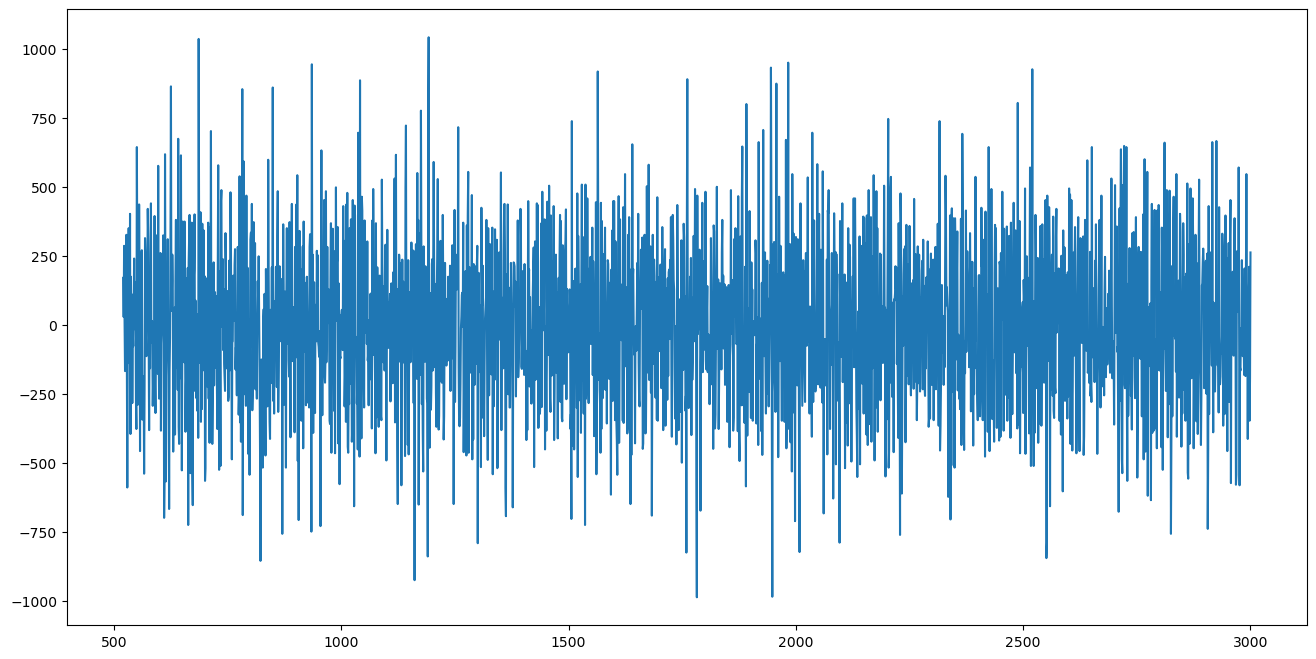

In [45]:
plt.figure(figsize=(16, 8))
returns[(50, 0.4)][20:].plot()

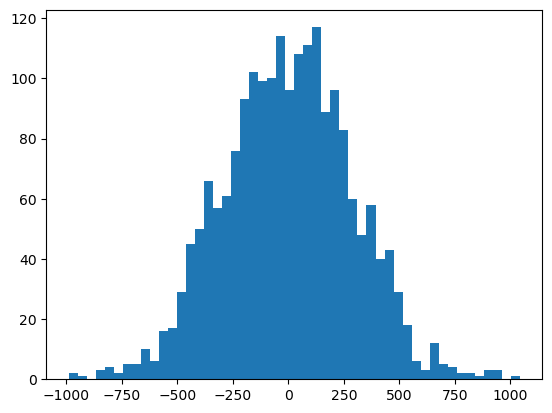

In [46]:
plt.hist(returns[(50, 0.4)][500:], bins=50)
plt.show()

In [85]:
returns.columns.levels[0]

Index([10, 20, 30, 40, 50], dtype='int64', name='alpha')

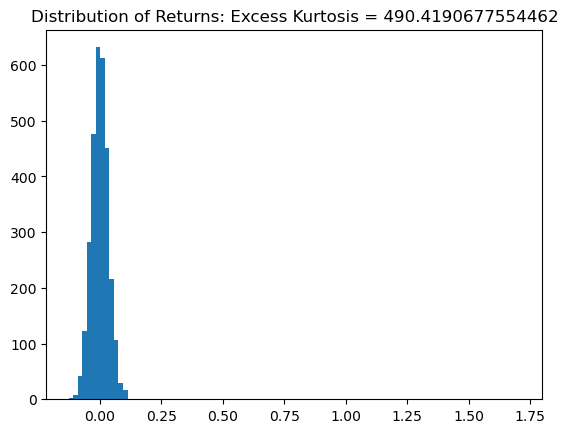

In [86]:
def plot_return_distribution(returns, save = True):
    #returns = np.log(self.M_t_values/self.M_t_values.shift(1))
    excess_kurtosis = stats.kurtosis(returns[np.isfinite(returns)])
    plt.hist(returns[np.isfinite(returns)], bins=100)
    plt.title(f'Distribution of Returns: Excess Kurtosis = {excess_kurtosis}')
    #if save == True: 
        #plt.savefig(path + 'return_distribution.png')

    plt.show()

plot_return_distribution(returns[20, 0.8], save = False)

/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_70404/862248566.py:13: RuntimeWarning: invalid value encountered in log
  kurt_values = np.log([stats.kurtosis(returns[np.isfinite(returns)][col].dropna()) for col in returns.columns])


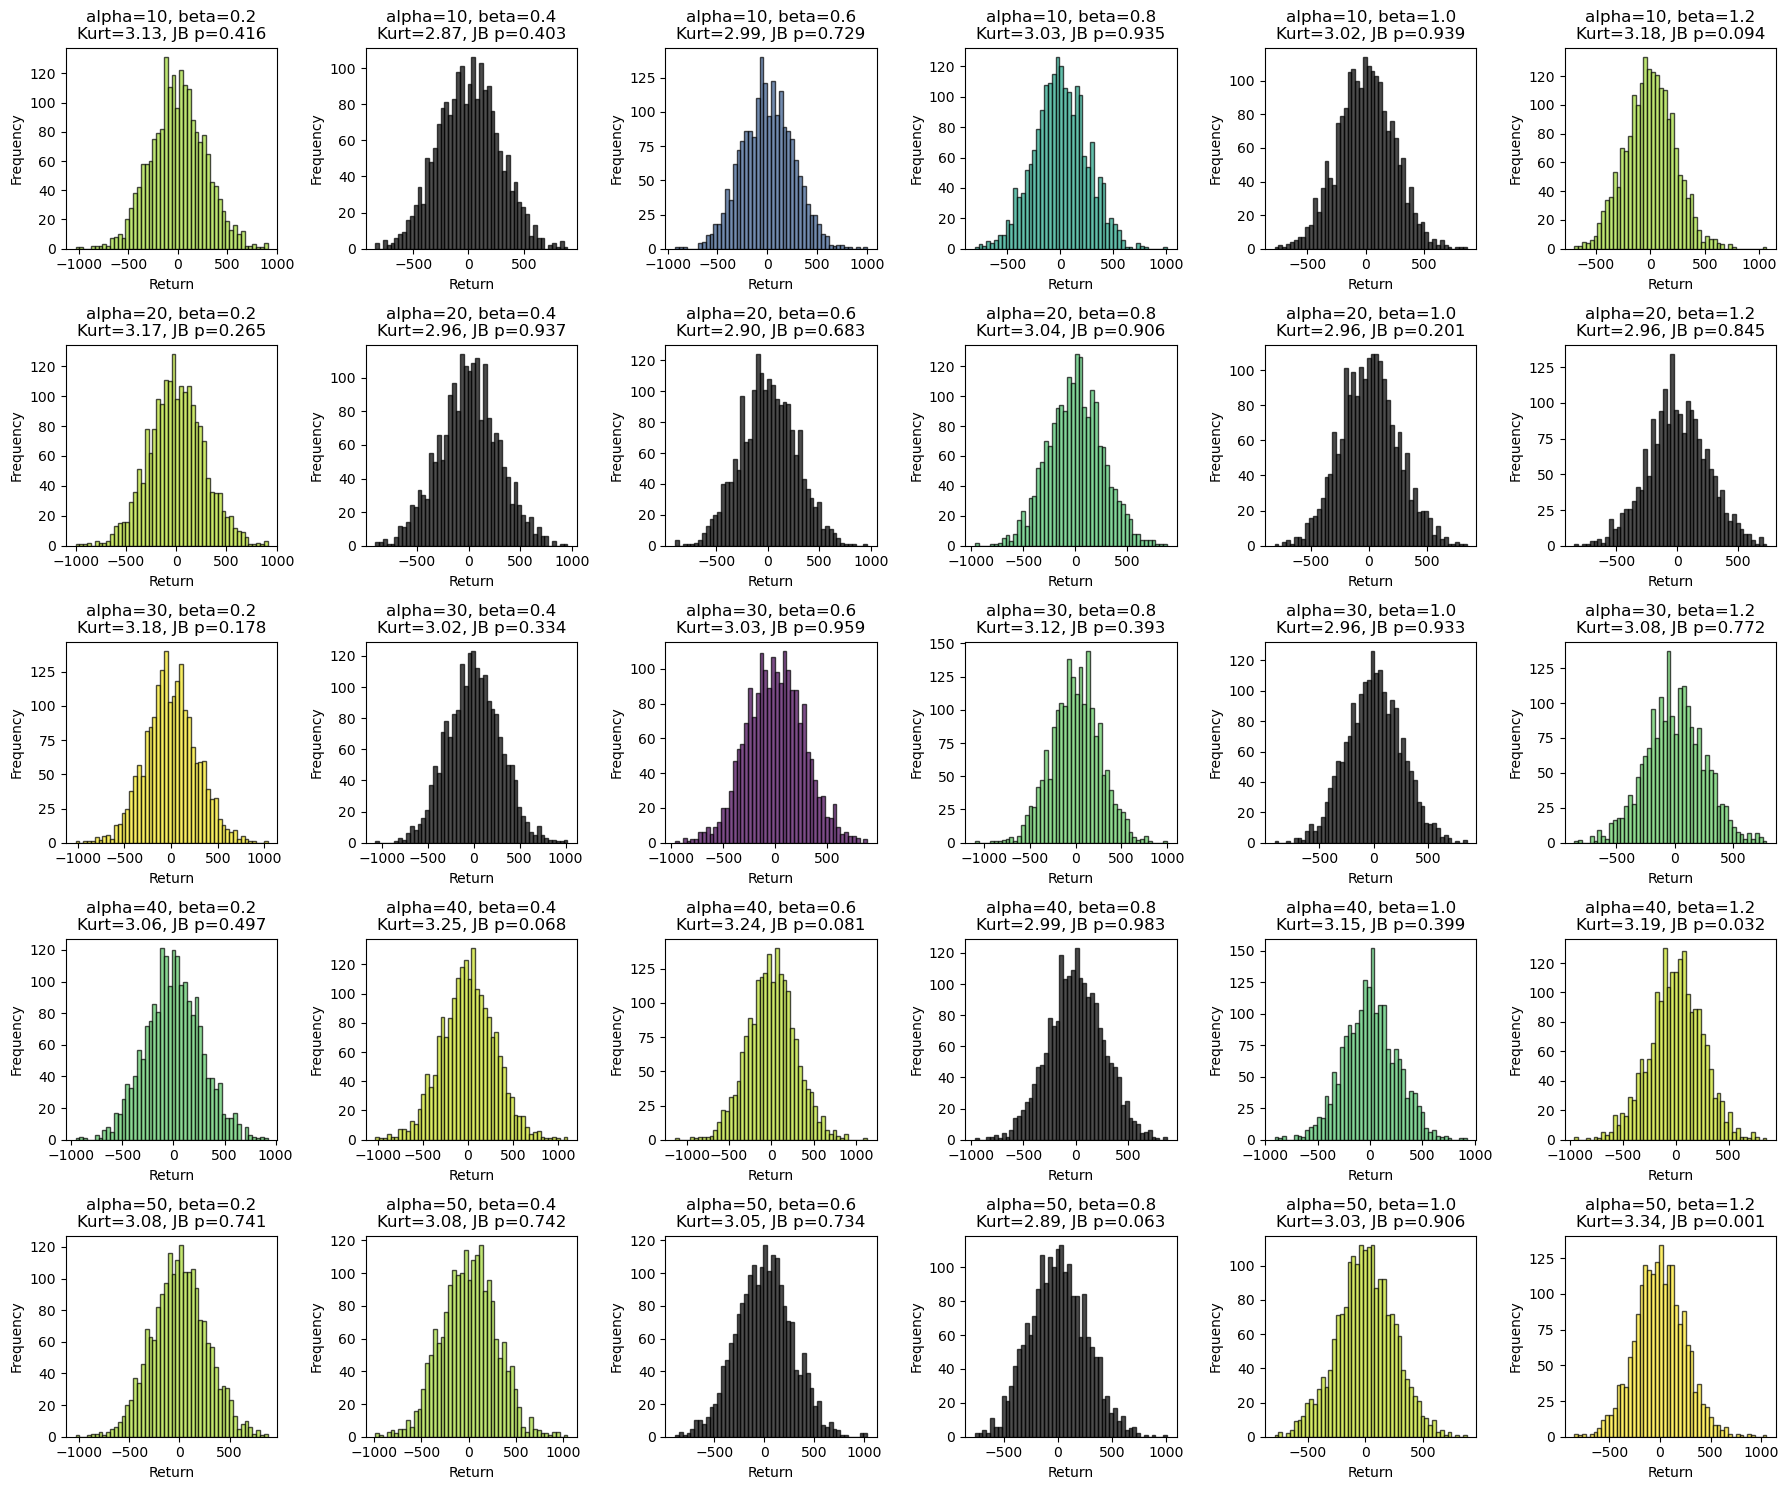

In [41]:
from matplotlib import cm

# ploting the distribution and kurtosis of $\beta$, and use Jarque-Bera test to test the normality of the distribution.

# Create a 5x6 grid of subplots
n_rows, n_cols = 5, 6
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 15))

# Flatten axes for easier iteration
axes = axes.flatten()

# Compute kurtosis for all columns and normalize for colormap
kurt_values = np.log([stats.kurtosis(returns[np.isfinite(returns)][col].dropna()) for col in returns.columns])
kurt_min, kurt_max = min(kurt_values), max(kurt_values)
norm_kurt = [(k - kurt_min) / (kurt_max - kurt_min) for k in kurt_values]  # Normalize between 0 and 1

# Iterate over each (alpha, beta) pair and plot the distribution
for idx, (col, ax) in enumerate(zip(returns.columns, axes)):
    #print(returns[np.isfinite(returns)][col].dropna())
    series = returns[np.isfinite(returns)][col].dropna()[500:]
    
    
    # Compute kurtosis and Jarque-Bera test
    kurt = stats.kurtosis(series, fisher=False)
    jb_stat, jb_p = stats.jarque_bera(series)

    color = cm.viridis(norm_kurt[idx])
    
    # Set title with kurtosis and p-value
    ax.hist(series, bins=50, edgecolor='k', alpha=0.7, color = color)
    ax.set_title(f'alpha={col[0]}, beta={col[1]}\nKurt={kurt:.2f}, JB p={jb_p:.3f}')
    ax.set_xlabel('Return')
    ax.set_ylabel('Frequency')
    #ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


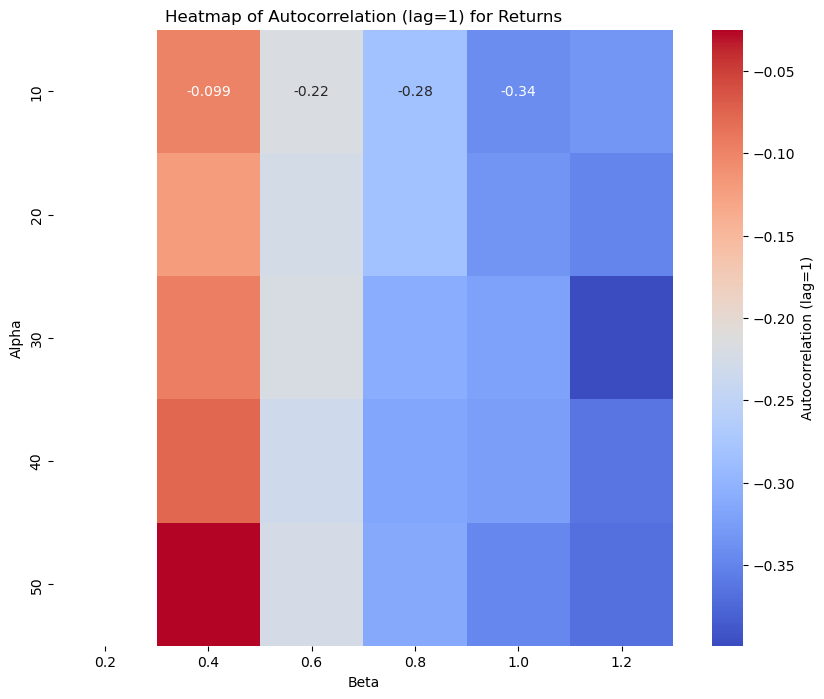

/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


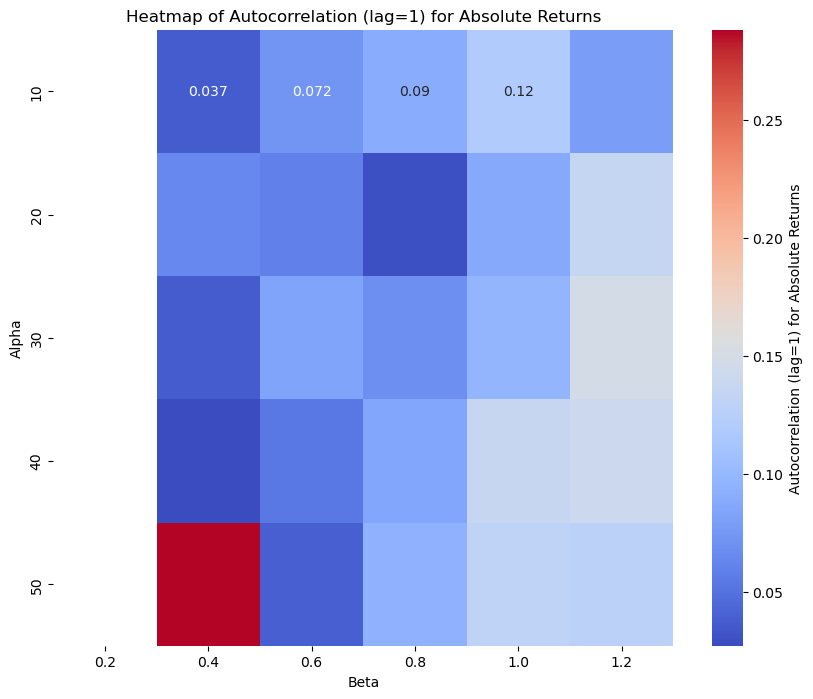

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'returns' DataFrame is already loaded with MultiIndex columns ('alpha', 'beta')

# Function to compute autocorrelation for a given lag
def autocorrelation(series, lag=1):
    return series.autocorr(lag)

# Define parameters for heatmap
alpha_values = returns.columns.levels[0]
beta_values = returns.columns.levels[1]
n_alpha = len(alpha_values)
n_beta = len(beta_values)

# Initialize heatmaps for return and absolute return
autocorr_heatmap = np.zeros((n_alpha, n_beta))
abs_autocorr_heatmap = np.zeros((n_alpha, n_beta))

# Compute autocorrelation for lag=1 for each (alpha, beta) pair
for i, alpha in enumerate(alpha_values):
    for j, beta in enumerate(beta_values):
        series = returns[(alpha, beta)].dropna()[500:]
        autocorr_heatmap[i, j] = autocorrelation(series, lag=1)
        abs_autocorr_heatmap[i, j] = autocorrelation(series.abs(), lag=1)

# Plot heatmap for autocorrelation of returns using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(autocorr_heatmap, annot=True, xticklabels=beta_values, yticklabels=alpha_values, cmap='coolwarm', cbar_kws={'label': 'Autocorrelation (lag=1)'})
plt.title('Heatmap of Autocorrelation (lag=1) for Returns')
plt.xlabel('Beta')
plt.ylabel('Alpha')
plt.show()

# Plot heatmap for autocorrelation of absolute returns using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(abs_autocorr_heatmap, annot=True, xticklabels=beta_values, yticklabels=alpha_values, cmap='coolwarm', cbar_kws={'label': 'Autocorrelation (lag=1) for Absolute Returns'})
plt.title('Heatmap of Autocorrelation (lag=1) for Absolute Returns')
plt.xlabel('Beta')
plt.ylabel('Alpha')
plt.show()

<Axes: >

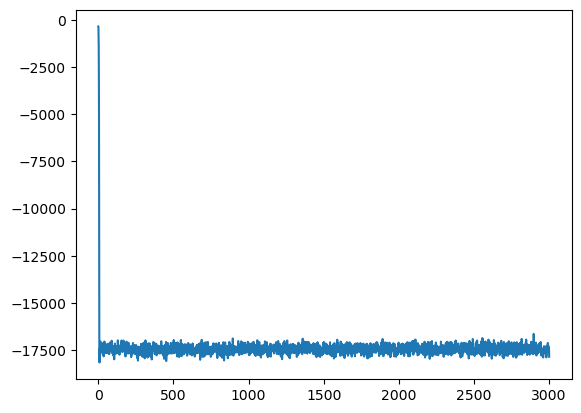

In [18]:
data[(10, 1.2)].plot()